In [1]:
# Official packages
import os
import copy
import xml.etree.ElementTree as ET

# Third-party packages
import numpy as np

import matplotlib.pyplot as plt

# In-house packages
from SPINitExp import SPINitEvolution, SPINitSweep

512 200
(200, 512)


<Figure size 432x288 with 0 Axes>

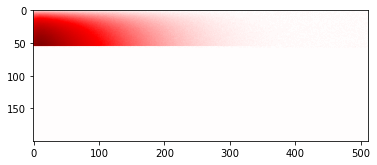

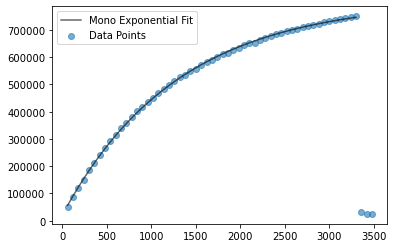

In [10]:
dataset_path_1106 = "./data_example/1106/"

dataset_1106 = SPINitEvolution(dataset_path_1106, signal_processing_mode="Magnitude")

print(dataset_1106.params['ACQUISITION_MATRIX_DIMENSION_1D'], dataset_1106.params['ACQUISITION_MATRIX_DIMENSION_2D'])
print(np.shape(dataset_1106.data))


plt.figure()
dataset_1106.plot_data_magnitude_2d()
plt.show()

plt.figure()
time_pts, intensity_pts = dataset_1106.bup_curve
plt.scatter(x=time_pts,y=intensity_pts, alpha=.6, label="Data Points")
time_pts_fit, intensity_pts, intensity_pts_fit, popt = dataset_1106.fit_model
plt.plot(time_pts_fit,intensity_pts_fit,linewidth=1.5, alpha=.6, color='k', label="Mono Exponential Fit")
plt.legend()
plt.show()

512 31
(31, 512)


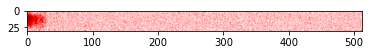

{'frequency center': '0.0', 'frequency window': '500000.0', 'line broadening': '1000.0', 'Initial frequency': '1.878E11', 'Frequency step': '5000000.0'}


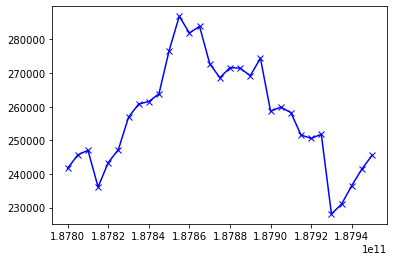

In [4]:
dataset_path_1033 = "./data_example/1033/"

dataset_1033 = SPINitSweep(dataset_path_1033, signal_processing_mode = "Magnitude")

print(dataset_1033.params['ACQUISITION_MATRIX_DIMENSION_1D'], dataset_1033.params['ACQUISITION_MATRIX_DIMENSION_2D'])
print(np.shape(dataset_1033.data))

dataset_1033.plot_data_magnitude_2d()

print(dataset_1033.sweep_params)
plt.figure()
sweep_pts, intensity_pts = dataset_1033.sweep_profile
plt.plot(sweep_pts, intensity_pts,  'xb-')
plt.show()

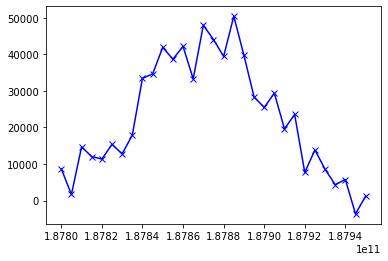

In [5]:
dataset_path_1033 = "./data_example/1033/"


# This HFS method is Only valid when the T2* of the F1 dimension of FID is MUCH SHORTER than 50% of the total acquisition time on F1!
# If the signal exists in the second half of the direct F1 readout, this denoising method introduces huge error.
dataset_1033 = SPINitSweep(dataset_path_1033, signal_processing_method = 'half_fid_substraction')

plt.figure()
sweep_pts, intensity_pts = dataset_1033.sweep_profile
plt.plot(sweep_pts, intensity_pts,  'xb-')
plt.show()